<a href="https://colab.research.google.com/github/kechase/Chase_DSPN_S25/blob/main/main/ExerciseSubmissions/KChase_Exercise_5_Using_ggplot_visualization_as_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [46]:
# Install if needed
install.packages("gapminder")

# Load the packages
library(tidyverse)
library(gapminder)

# View the data
head(gapminder)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

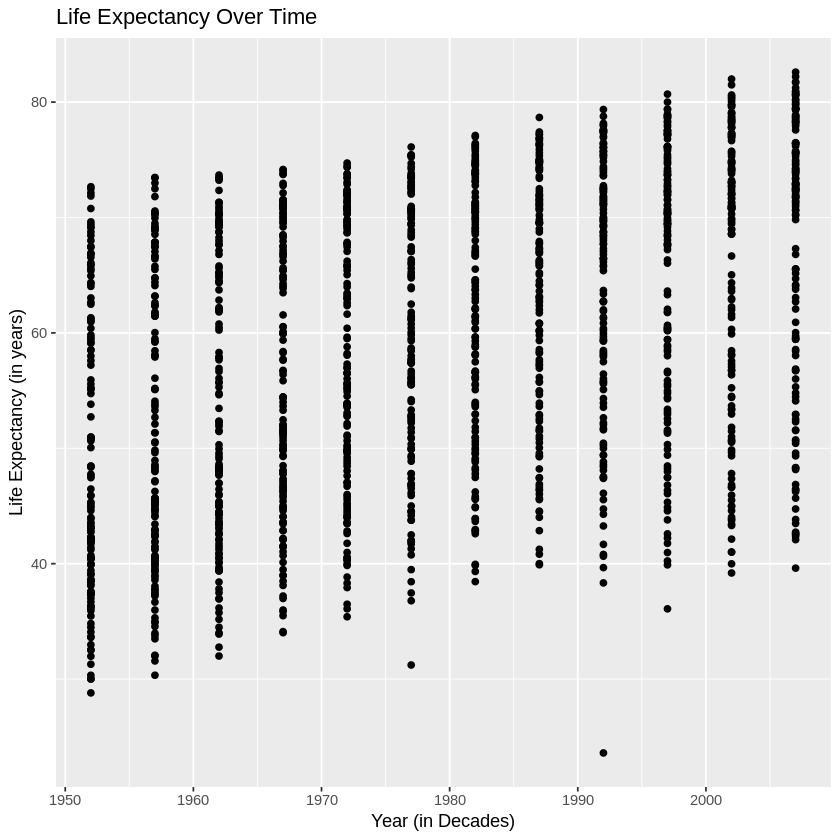

In [47]:
# Basic scatterplot using ggplot2 that shows how life expectancy has changed over time
gapminder %>%
  ggplot(aes(x = year, y = lifeExp)) + #aes are aesthetics of the ggplot
  geom_point() + # Add scatter plot points
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")


We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so.

What trends can you identify in the data?

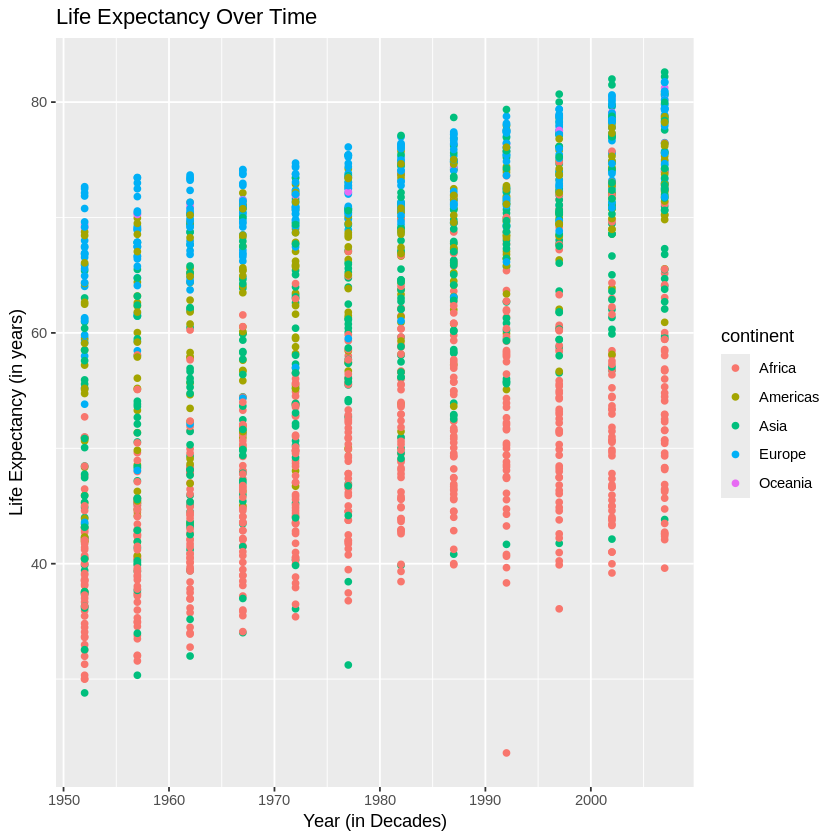

In [48]:
gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent)) +
  geom_point() +
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")


> *Write your response here.*
> *The colors add critical information re relationship between location and life expectancy.



Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot.

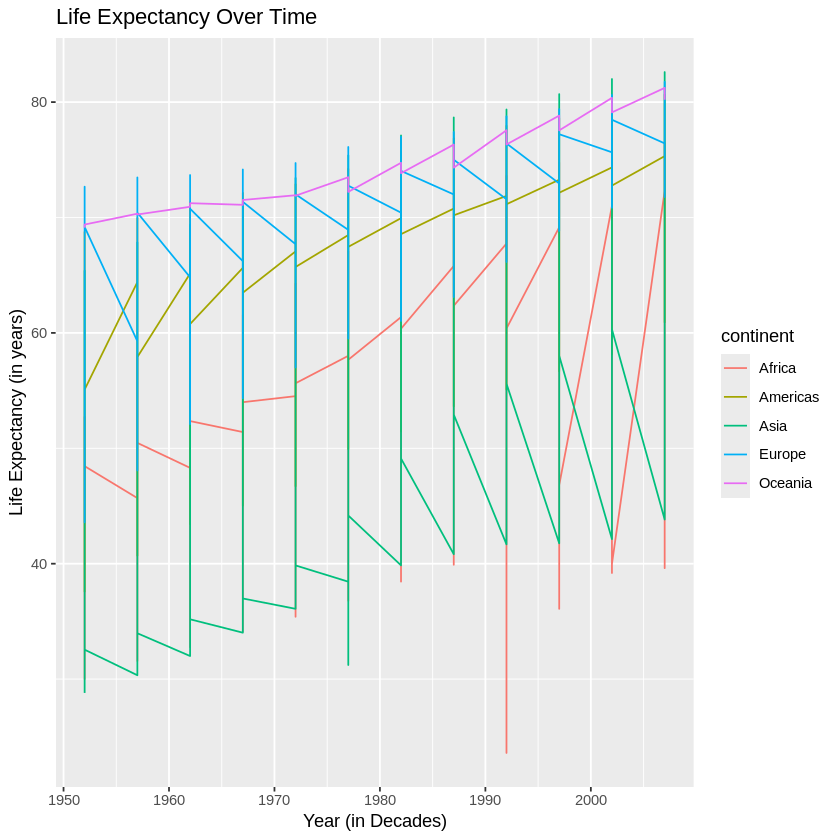

In [14]:
gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent)) +
  geom_line() + # This is the line version of geom_point()
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> *As programmed, each line groups data from all the countries on that continent into one; it makes it hard to parse what's going on. At the very least, an indication that all countries on any given continent don't have similar trend lines.



Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

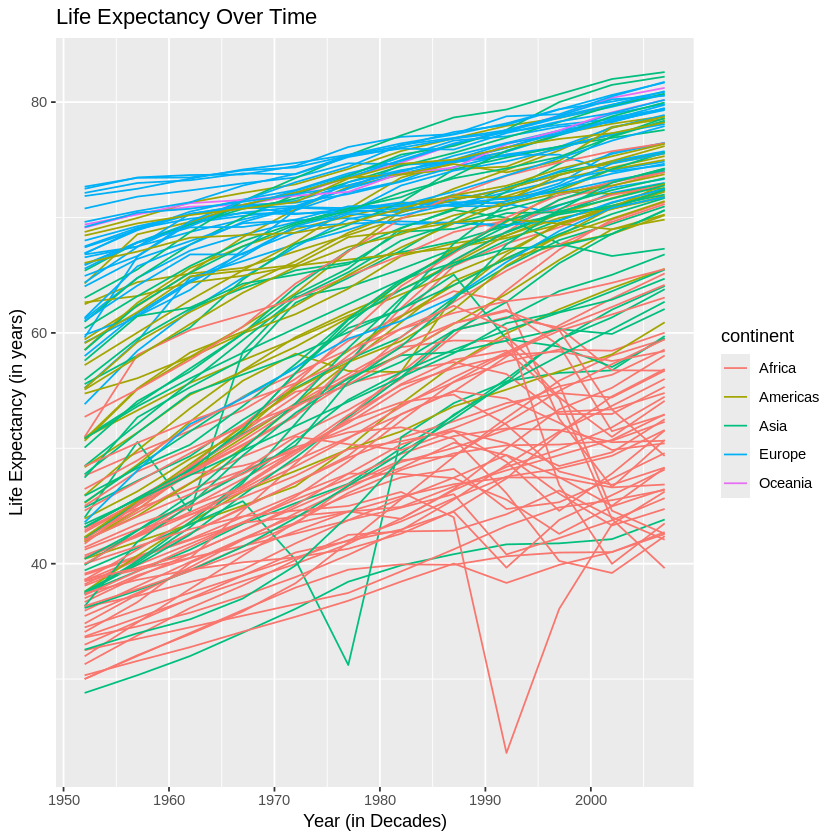

In [49]:
gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent, group = country)) + #added group so each country gets own line
  geom_line() +
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")



But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer).

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

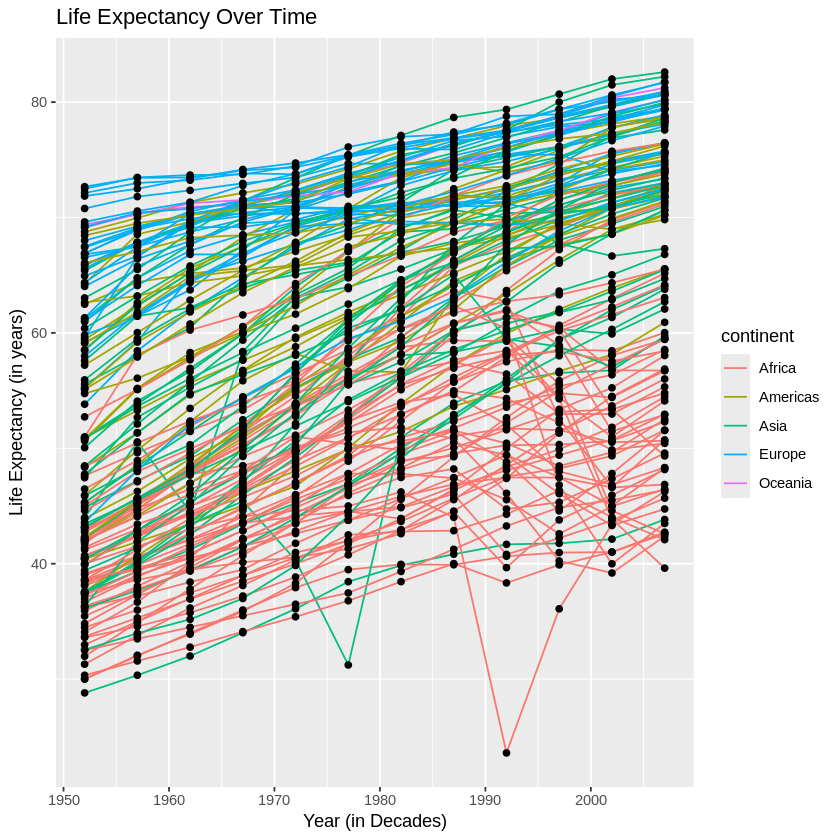

In [24]:
# Method 1: Plot black points on top of the colorful lines
gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent, group = country)) +
  geom_line() + # This is the line version of geom_point()
  geom_point(color = "black") + #this layer is last so will be on top of the previous layer
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")



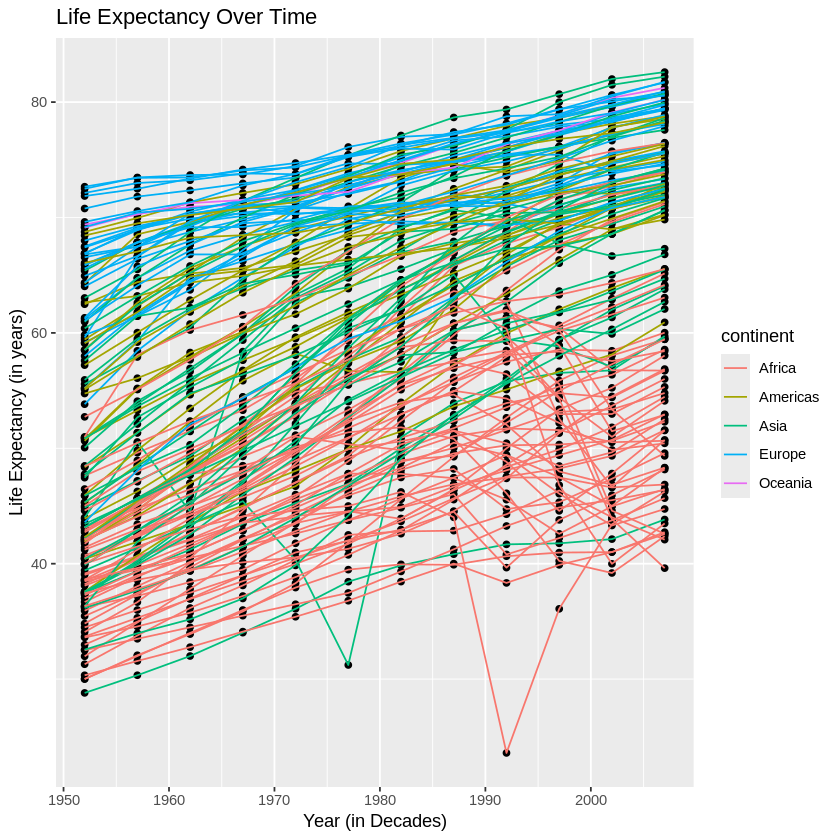

In [25]:
# Method 2: Plot black points underneath the colorful lines

gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent, group = country)) +
  geom_point(color = "black") +
  geom_line() + #this layer is last so will be on top of the previous layer
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")


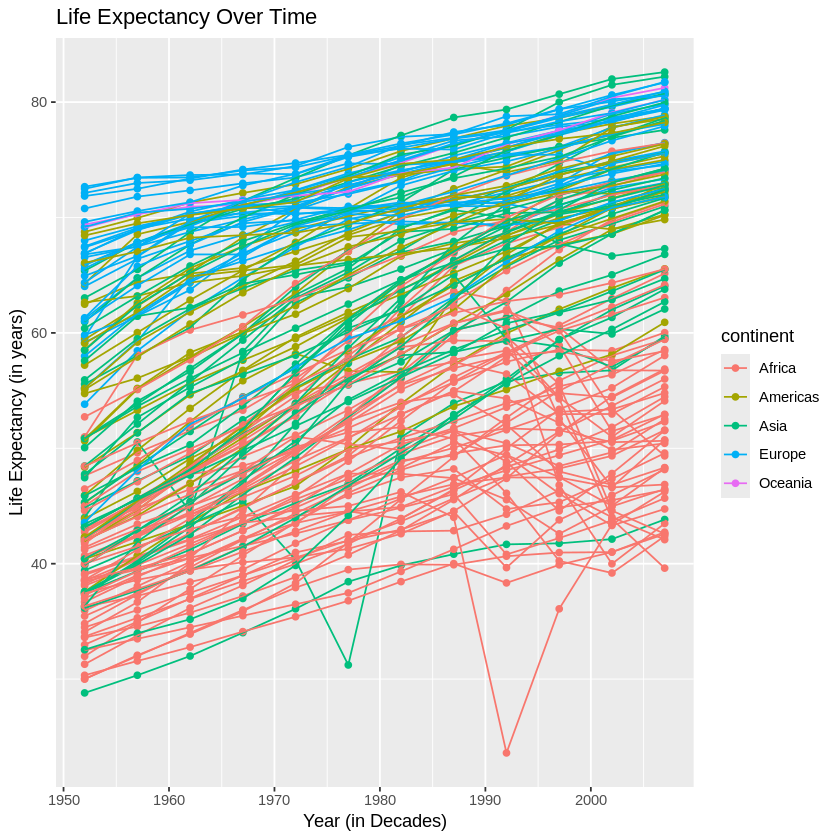

In [26]:
gapminder %>%
  ggplot(aes(x = year, y = lifeExp, color = continent, group = country)) +
  geom_point() +
  geom_line() + #this layer is last so will be on top of the previous layer
  labs(title = "Life Expectancy Over Time",
       x = "Year (in Decades)",
       y = "Life Expectancy (in years)")

 #this is fun!


---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data.

The graph below shows the relationship between life expectency and GDP per capita:

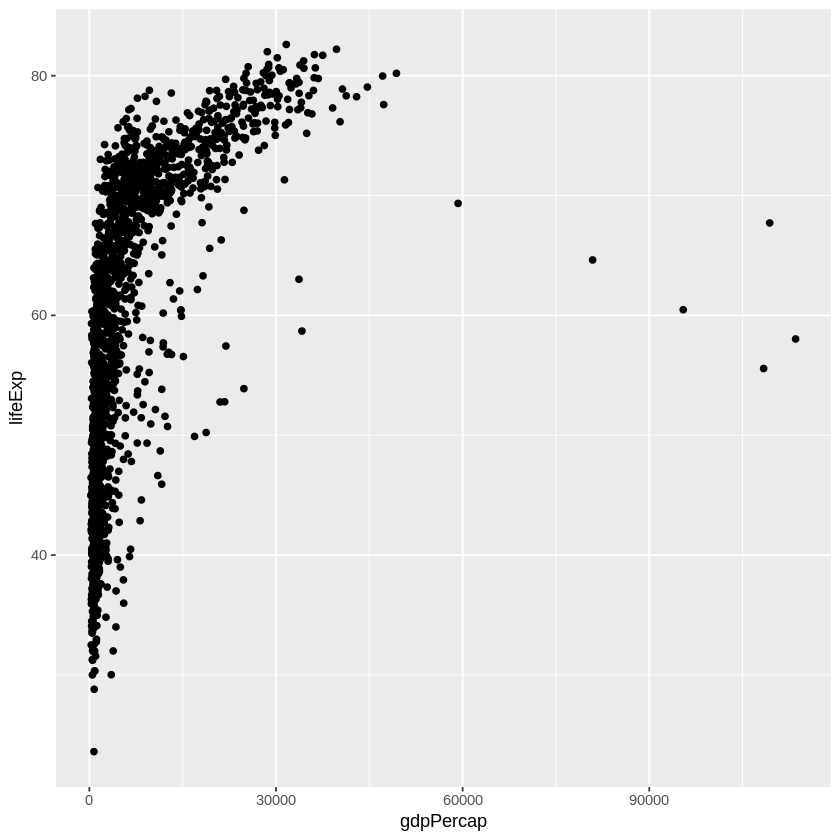

In [27]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

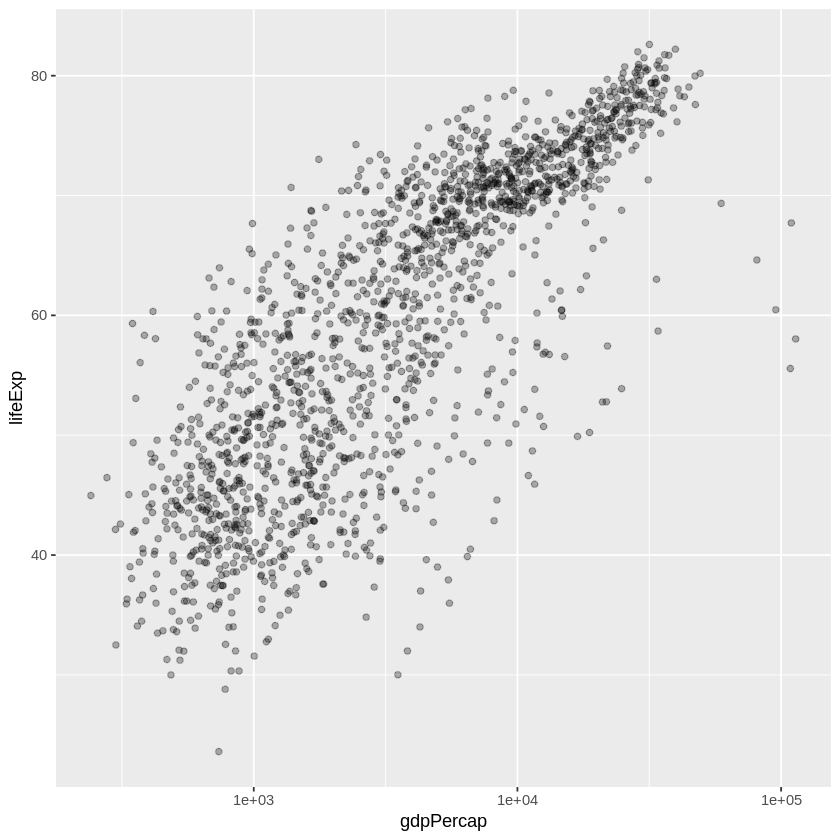

In [33]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
geom_point(alpha = 0.3) + # 70% transparent points - Using alpha (0 = fully transparent, 1 = fully opaque)
scale_x_log10()  # log scale for x-axis

Already we can more easily visualize the trend in the data.

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


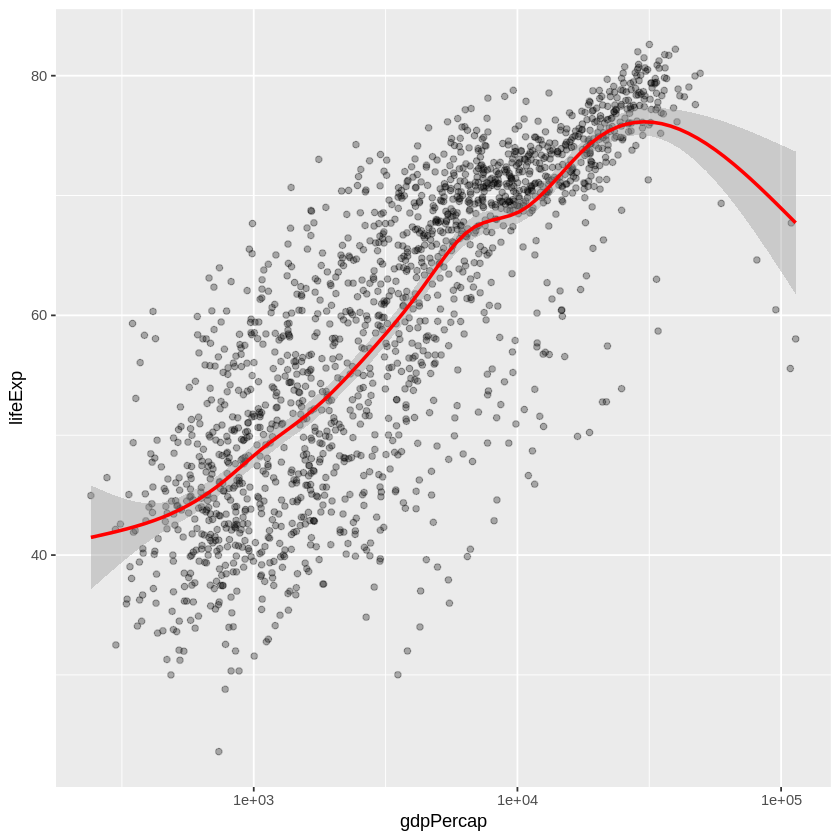

In [42]:
# fiting a simple relationship to the data by adding a geom_smooth layer
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
geom_point(alpha = 0.3) + # 70% transparent points - Using alpha (0 = fully transparent, 1 = fully opaque)
scale_x_log10() +  # log scale for x-axis
geom_smooth(color = "red") #showing confidence interval

Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


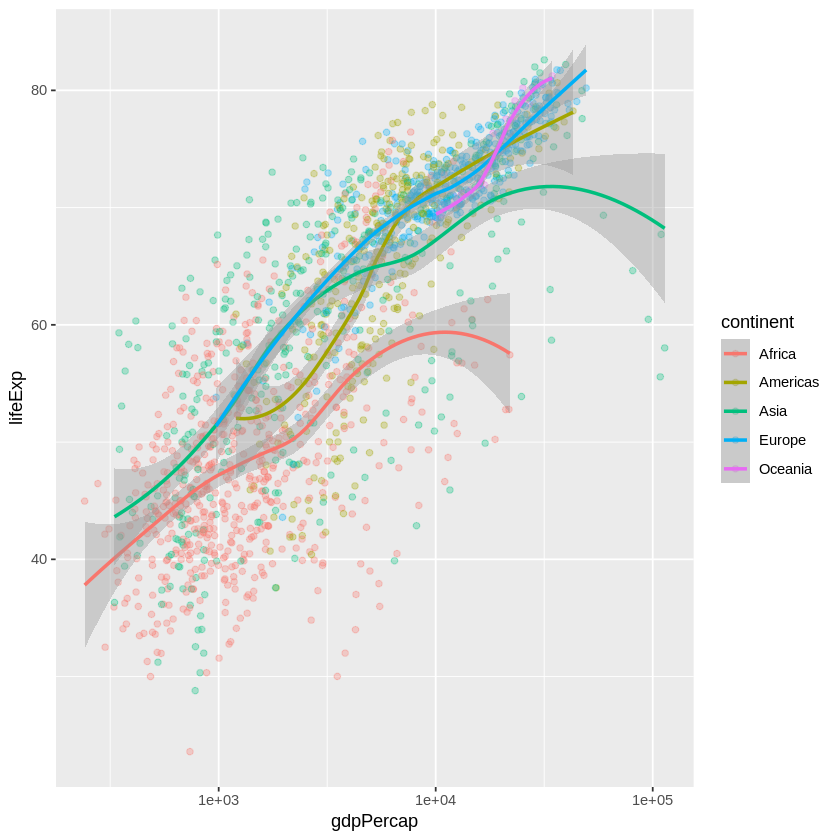

In [45]:
# INSERT CODE HERE
# fiting a simple relationship to the data by adding a geom_smooth layer with separate color for each continent and individual trendlines for each continent
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
geom_point(alpha = 0.3) + # 70% transparent points - Using alpha (0 = fully transparent, 1 = fully opaque)
scale_x_log10() +  # log scale for x-axis
geom_smooth() #showing confidence intervals


When you are finished, save the notebook as Exercise5.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 14, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*